In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [2]:
# All general imports
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import io, os, gc

In [4]:
# Loading drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Setting the working directory 
!ls
%cd drive/MyDrive/Project
!pwd

drive  sample_data
/content/drive/MyDrive/Project
/content/drive/MyDrive/Project


In [35]:
bd_results = pd.read_csv('results/BD_test_examples.csv')
fnc_results = pd.read_csv('results/FNC_test_examples.csv')

bd_train = pd.read_csv('data/train_bd_with_labels_2nd.csv')
fnc_train = pd.read_csv('data/train_fnc_with_labels_2nd.csv')

In [ ]:
#!pip install yellowbrick
from yellowbrick.target import ClassBalance
import matplotlib.pyplot as plt

print("Class balance for BD test data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agreed', 'disagreed'], ax=ax1)
visualiser_bd.fit(bd_results['bd_label'])
visualiser_bd.finalize()

Class balance for BD train data: 


{'agreed': 74177, 'disagreed': 6815}

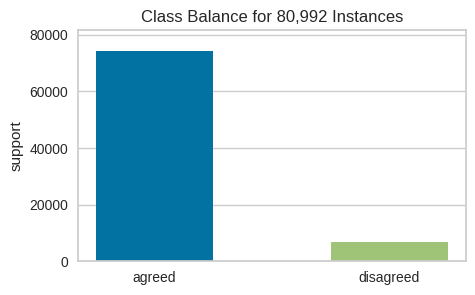

In [44]:
print("Class balance for BD train data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agreed', 'disagreed'], ax=ax1)
visualiser_bd.fit(bd_train['bd_label'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_train['bd_label'], return_counts=True)
dict(zip(unique, counts))

Class balance for BD train data (emotion labels): 


{'agree': 50928, 'disagree': 30064}

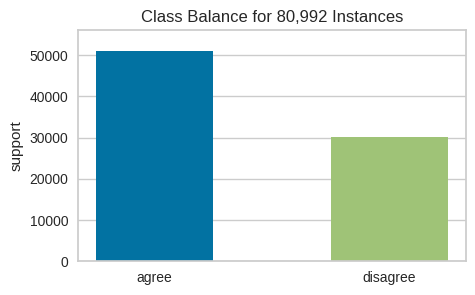

In [32]:
print("Class balance for BD train data (emotion labels): ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(bd_train['single_new_emo'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_train['single_new_emo'], return_counts=True)
dict(zip(unique, counts))

Class balance for BD train data (novelty): 


{0: 6590, 1: 74402}

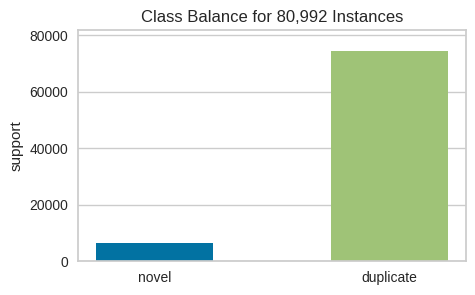

In [33]:
print("Class balance for BD train data (novelty): ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['novel', 'duplicate'], ax=ax1)
visualiser_bd.fit(bd_train['novelty_label'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_train['novelty_label'], return_counts=True)
dict(zip(unique, counts))

Class balance for FNC train data: 


{'agree': 2948, 'disagree': 667}

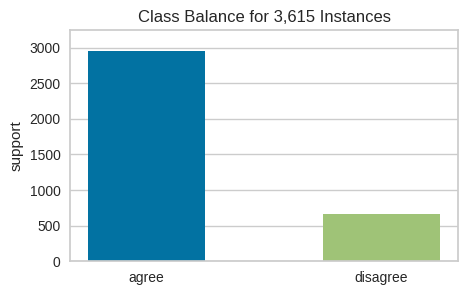

In [36]:
print("Class balance for FNC train data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(fnc_train['Stance'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_train['Stance'], return_counts=True)
dict(zip(unique, counts))

Class balance for FNC train data (emotion): 


{'agree': 2378, 'disagree': 1237}

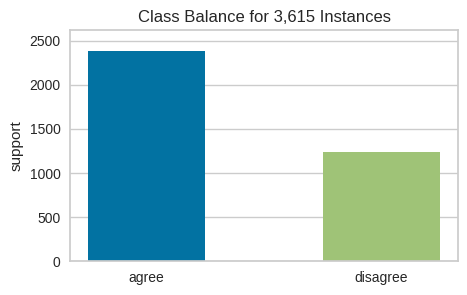

In [37]:
print("Class balance for FNC train data (emotion): ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(fnc_train['single_new_emo'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_train['single_new_emo'], return_counts=True)
dict(zip(unique, counts))

Class balance for FNC train data (novelty): 


{0: 715, 1: 2900}

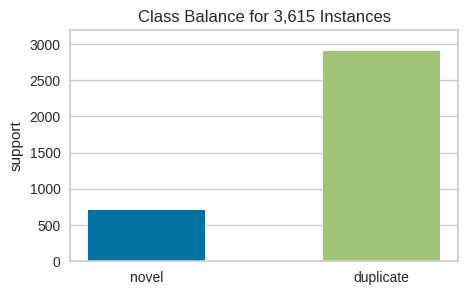

In [38]:
print("Class balance for FNC train data (novelty): ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['novel', 'duplicate'], ax=ax1)
visualiser_bd.fit(fnc_train['novelty_label'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_train['novelty_label'], return_counts=True)
dict(zip(unique, counts))

Class balance for BD test data: 


{'agreed': 27075, 'disagreed': 1671}

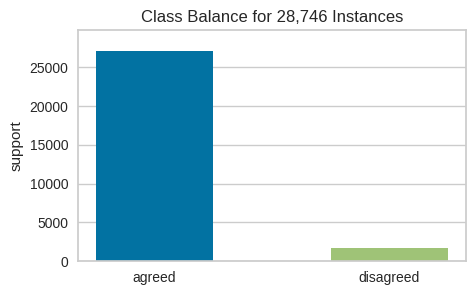

In [39]:
print("Class balance for BD test data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agreed', 'disagreed'], ax=ax1)
visualiser_bd.fit(bd_results['bd_label'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_results['bd_label'], return_counts=True)
dict(zip(unique, counts))

Predicted fake news labels: 


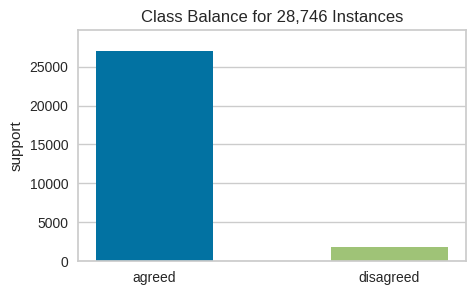

In [10]:
print("Predicted fake news labels: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agreed', 'disagreed'], ax=ax1)
visualiser_bd.fit(bd_results['Fake_News_Labels'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_results['Fake_News_Labels'], return_counts=True)
dict(zip(unique, counts))

Predicted emotion labels: 


{0: 20137, 1: 8609}

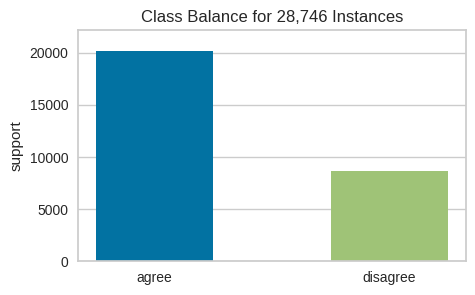

In [40]:
print("Predicted emotion labels: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(bd_results['Emotion_Labels'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_results['Emotion_Labels'], return_counts=True)
dict(zip(unique, counts))

Predicted novelty labels: 


{0: 1489, 1: 27257}

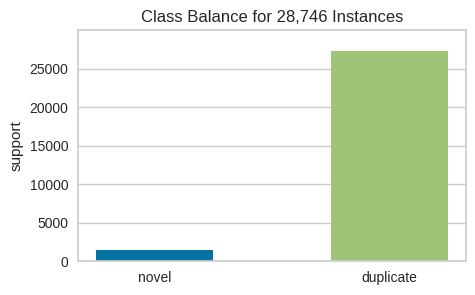

In [42]:
print("Predicted novelty labels: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['novel', 'duplicate'], ax=ax1)
visualiser_bd.fit(bd_results['Novelty_Labels'])
visualiser_bd.finalize()

unique, counts = np.unique(bd_results['Novelty_Labels'], return_counts=True)
dict(zip(unique, counts))

Class balance for FNC test data: 


{'agree': 1903, 'disagree': 697}

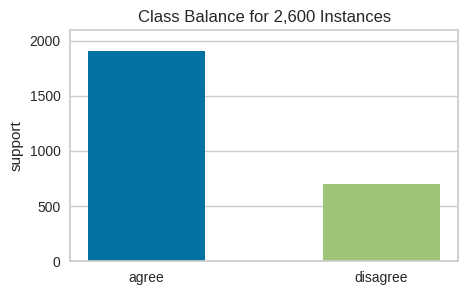

In [43]:
print("Class balance for FNC test data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(fnc_results['Stance'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_results['Stance'], return_counts=True)
dict(zip(unique, counts))

Predicted fake news labels for FNC test data: 


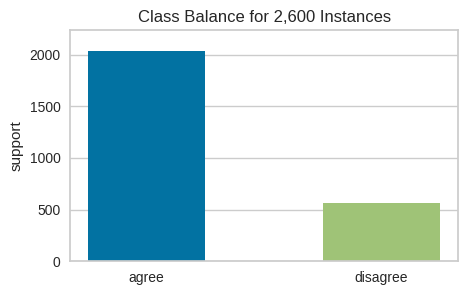

In [20]:
print("Predicted fake news labels for FNC test data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(fnc_results['Fake_News_Labels'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_results['Fake_News_Labels'], return_counts=True)
dict(zip(unique, counts))

Predicted emotion labels for FNC test data: 


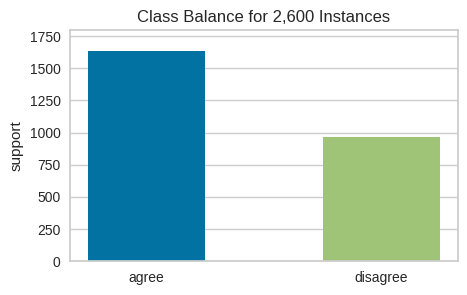

In [23]:
print("Predicted emotion labels for FNC test data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['agree', 'disagree'], ax=ax1)
visualiser_bd.fit(fnc_results['Emotion_Labels'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_results['Emotion_Labels'], return_counts=True)
dict(zip(unique, counts))

Predicted novelty for FNC test data: 


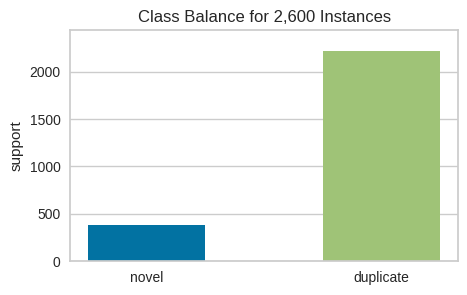

In [25]:
print("Predicted novelty for FNC test data: ")
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
visualiser_bd = ClassBalance(labels=['novel', 'duplicate'], ax=ax1)
visualiser_bd.fit(fnc_results['Novelty_Labels'])
visualiser_bd.finalize()

unique, counts = np.unique(fnc_results['Novelty_Labels'], return_counts=True)
dict(zip(unique, counts))